In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-u09ixcpl
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-u09ixcpl
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6119662 sha256=fcce954f08ad058d6c2b043d12c75

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.logger import setup_logger
setup_logger()

import os
import cv2
import pickle
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("DN_Mask", {}, "/content/drive/MyDrive/Celebal_CLE_Task_3/train.json", "/content/drive/MyDrive/Celebal_CLE_Task_3/train")

In [5]:
DN_Mask_metadata = MetadataCatalog.get("DN_Mask")
dataset_dicts = DatasetCatalog.get("DN_Mask")

[12/30 16:51:45 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Celebal_CLE_Task_3/train.json takes 1.22 seconds.
WARNING [12/30 16:51:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/30 16:51:45 d2.data.datasets.coco]: Loaded 401 images in COCO format from /content/drive/MyDrive/Celebal_CLE_Task_3/train.json


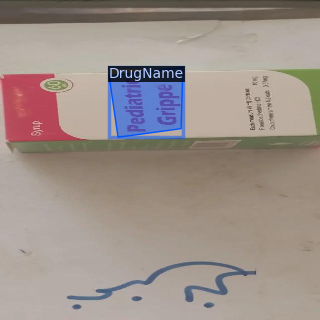

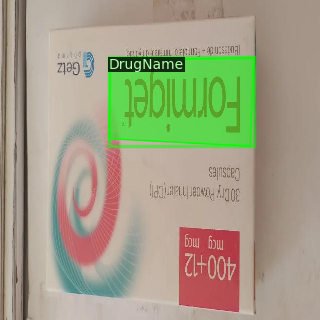

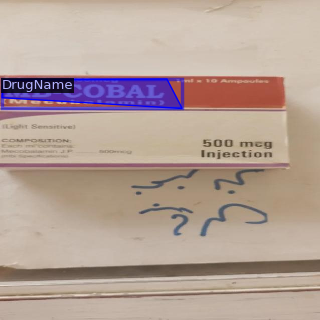

In [6]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=DN_Mask_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml'))
cfg.DATASETS.TRAIN = ("DN_Mask",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml')
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.MODEL.DEVICE='cuda'
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [ ]:
# cfg.OUTPUT_DIR = "/drive/MyDrive/Celebal_CLE_Task_3"

In [ ]:
import shutil
import os

# Define source and destination paths
source_file = '/content/output/model_final.pth'  # Replace with your source file path in Colab runtime
destination_folder = '/content/drive/MyDrive/Celebal'  # Replace with your destination folder path in Google Drive

# Check if the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move the file from Colab runtime to Google Drive folder
shutil.copy(source_file, destination_folder)


'/content/drive/MyDrive/Celebal/model_final.pth'

In [8]:
# cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml'))
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Celebal", "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
# cfg.DATASETS.TEST = ("DN_Mask", )
# predictor = DefaultPredictor(cfg)

# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95
# cfg.DATASETS.TEST = ("DN_Mask", )
predictor = DefaultPredictor(cfg)

[12/30 16:51:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Celebal/model_final.pth ...


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir output

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


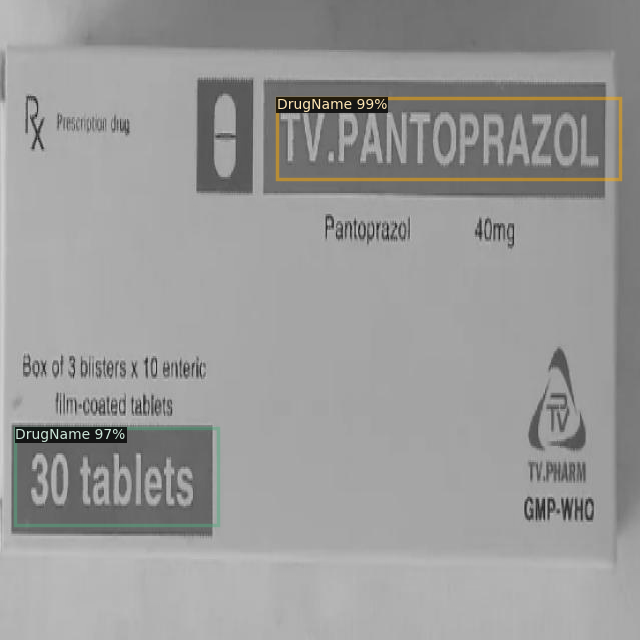

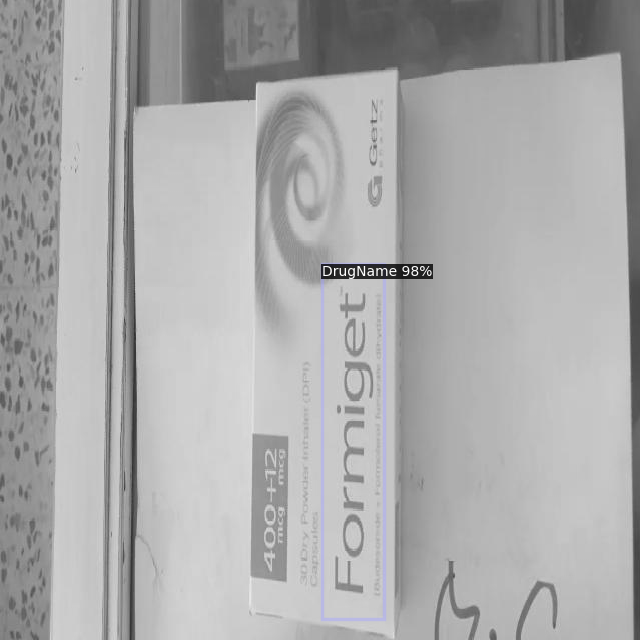

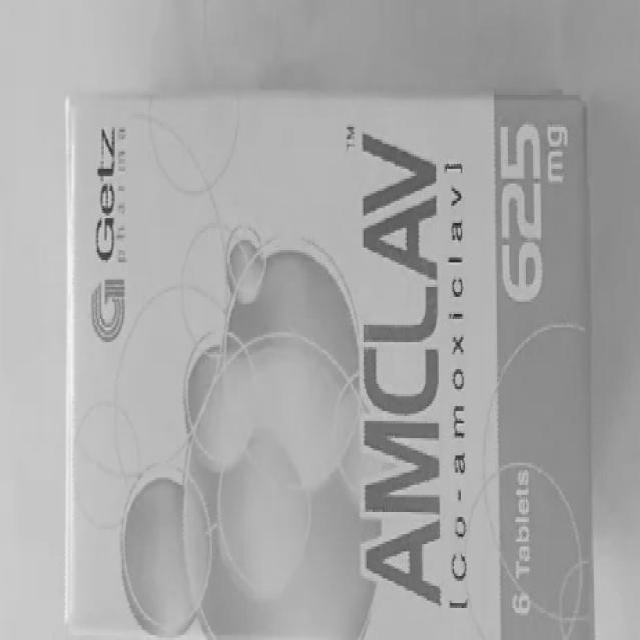

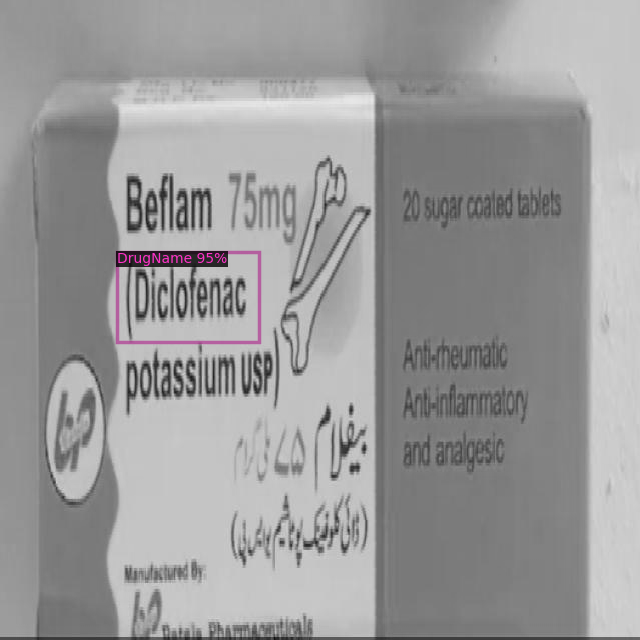

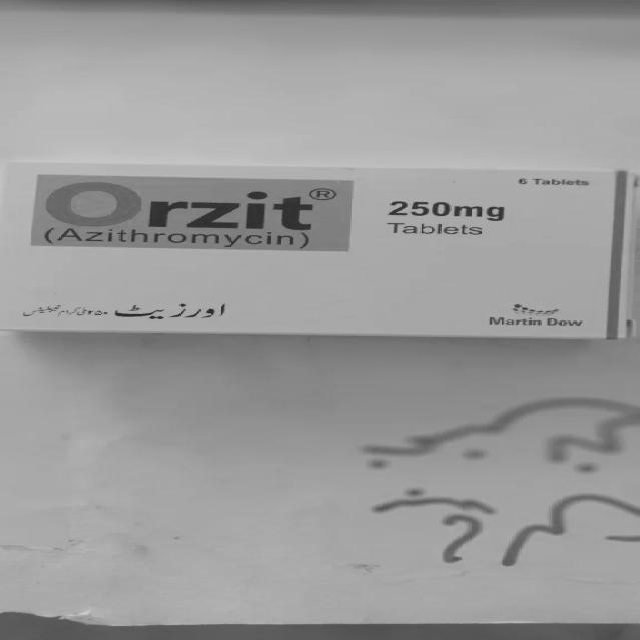

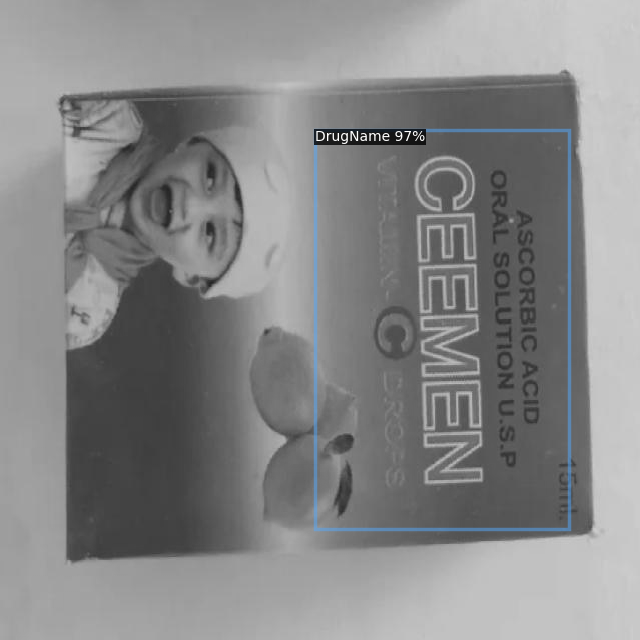

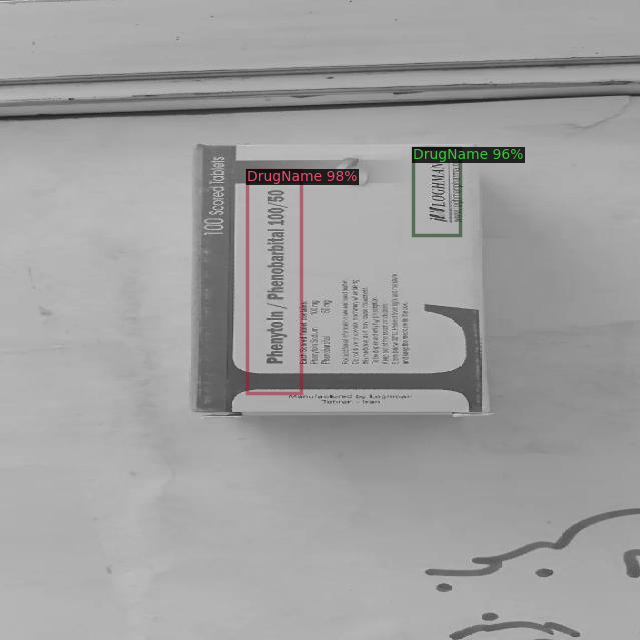

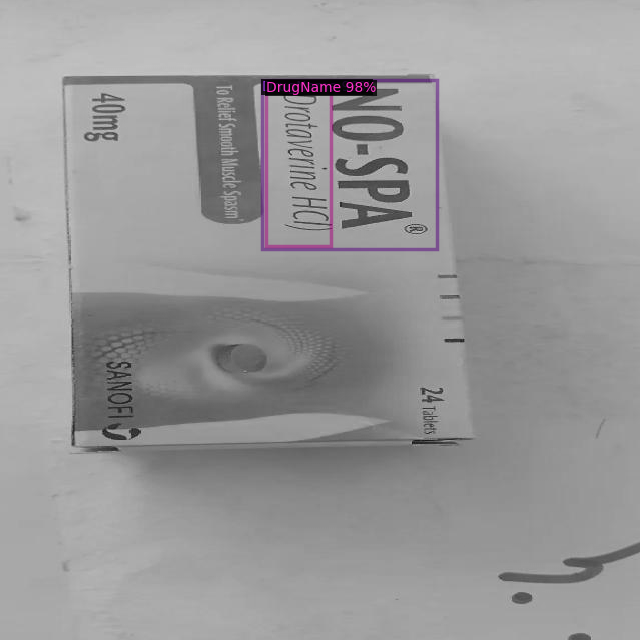

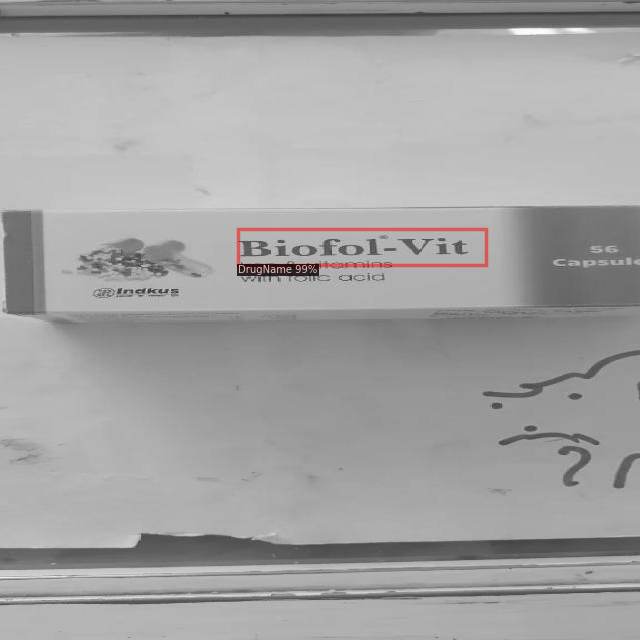

In [9]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 9):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=DN_Mask_metadata,
                   scale=1.,
                   instance_mode=ColorMode.IMAGE_BW
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [10]:
#import the COCO Evaluator to use the COCO Metrics
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

#register your data
# register_coco_instances("DN_Mask", {}, "/content/drive/MyDrive/Celebal_CLE_Task_3/train.json", "/content/drive/MyDrive/Celebal_CLE_Task_3/train")
register_coco_instances("DN_Mask_Test", {}, "/content/drive/MyDrive/Celebal_CLE_Task_3/test.json", "/content/drive/MyDrive/Celebal_CLE_Task_3/test")

#load the config file, configure the threshold value, load weights
# cfg = get_cfg()
# cfg.merge_from_file("/code/detectron2/detectron2/output/custom_mask_rcnn_X_101_32x8d_FPN_3x_Iteration_3_dataset.yaml")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# cfg.MODEL.WEIGHTS = "/code/detectron2/detectron2/output/model_final.pth"



# Create predictor
# predictor = DefaultPredictor(cfg)

#Call the COCO Evaluator function and pass the Validation Dataset
evaluator = COCOEvaluator("DN_Mask_Test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "DN_Mask_Test")

#Use the created predicted model in the previous step
inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [12/30 16:52:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [12/30 16:52:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/30 16:52:20 d2.data.datasets.coco]: Loaded 101 images in COCO format from /content/drive/MyDrive/Celebal_CLE_Task_3/test.json
[12/30 16:52:20 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  DrugName  | 101          |
|            |              |
[12/30 16:52:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/30 16:52:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/30 16:52:20 d2.data.common]: Serializing 101 elements to by

OrderedDict([('bbox',
              {'AP': 8.49460722982427,
               'AP50': 23.35379499112277,
               'AP75': 3.2288107817695666,
               'APs': nan,
               'APm': 12.9020902090209,
               'APl': 8.740480563257996})])

In [11]:
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
 return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
# !ngrok authtoken 2aBWoWvnsrH2WoCEz3Mlo2Pi93d_WcyQZpHZ4paEhqJPVM9q

In [ ]:
!ngrok authtoken 2aEFu41p9L7RXRAFHJ6VnjSc4wk_3exzza4ge77WiU7sUiJU1

In [ ]:
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename
import os
from flask import Flask, render_template, request, redirect, url_for
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
import cv2
template_folder = "/content/drive/MyDrive/Celebal/templates"

app = Flask(__name__, template_folder=template_folder)
run_with_ngrok(app)  # Start ngrok when app is run

# Set the upload folder and allowed extensions
UPLOAD_FOLDER = 'uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

os.makedirs("static", exist_ok=True)


@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return redirect(url_for('index'))

    file = request.files['file']

    if file.filename == '':
        return redirect(url_for('index'))

    # Save the uploaded file
    file_path = os.path.join('uploads', file.filename)
    file.save(file_path)

    # Perform prediction
    img = cv2.imread(file_path)
    outputs = predictor(img)
    # outputs = detector(img)

    # Visualize predictions
    v = Visualizer(img[:, :, ::-1], scale=1.2, instance_mode=ColorMode.IMAGE_BW)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    output_image_path = os.path.join('static', 'output_image.jpg')
    cv2.imwrite(output_image_path, out.get_image()[:, :, ::-1])

    return render_template('index.html', prediction_image=output_image_path)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://a738-35-240-147-161.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:15:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:15:58] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:16:08] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Dec/2023 07:16:08] "GET /static/output_image.jpg HTTP/1.1" 200 -


In [12]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [24]:
# %%writefile app.py

import streamlit as st
import cv2
from PIL import Image
import numpy as np
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode

from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
# from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.logger import setup_logger
setup_logger()

import os
import cv2
import pickle
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Set up the Detectron2 predictor

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml'))
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_C4_1x.yaml')
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.MODEL.DEVICE='cuda'
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Celebal", "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95
predictor = DefaultPredictor(cfg)


# Streamlit UI
st.title("Object Detection with Detectron2 and Streamlit")

uploaded_file = st.file_uploader("Choose a file", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Perform prediction
    img = Image.open(uploaded_file)
    img_array = np.array(img)
    outputs = predictor(img_array)

    # Visualize predictions
    v = Visualizer(img_array[:, :, ::-1], scale=1.2, instance_mode=ColorMode.IMAGE_BW)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Display the original image
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Display the annotated image
    st.image(out.get_image()[:, :, ::-1], caption="Prediction", use_column_width=True)

Overwriting app.py


In [14]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.189s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [25]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.16.137.163
npx: installed 22 in 4.19s
your url is: https://many-plants-rest.loca.lt
